Dataset titanic dibagi menjadi 2 berdasarkan tipe, yaitu categorical dan numerical

In [1]:
#Import Libraries dulu
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset_training = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
dataset_validation = pd.read_csv('/content/drive/My Drive/titanic_eval.csv')

In [3]:
dataset_training.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
dataset_training = dataset_training.replace('unknown', np.nan) # Ganti nilai unknown jadi NaN

In [5]:
#Kita cari apakah data training punya data null
dataset_training.isnull().sum()

survived                0
sex                     0
age                     0
n_siblings_spouses      0
parch                   0
fare                    0
class                   0
deck                  481
embark_town             1
alone                   0
dtype: int64

In [6]:
dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                146 non-null    object 
 8   embark_town         626 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


Kalau diperhatikan, feature deck memiliki banyak NaN, kita akan drop feature tersebut. Feature 'embark_town' juga tidak bergitu penting.

In [7]:
dataset_training.drop('deck', axis=1, inplace=True)
dataset_training.drop('embark_town', axis=1, inplace=True)

In [8]:
#Kita ganti kolom 'sex' menjadi data numerik
sex_mapping = {"male": 0, "female": 1}
dataset_training['sex'] = dataset_training['sex'].map(sex_mapping)
dataset_training.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone
0,0,0,22.0,1,0,7.2500,Third,n
1,1,1,38.0,1,0,71.2833,First,n
2,1,1,26.0,0,0,7.9250,Third,y
3,1,1,35.0,1,0,53.1000,First,n
4,0,0,28.0,0,0,8.4583,Third,y


In [9]:
#Kita ganti kolom 'class' menjadi data numerik
class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
dataset_training['class'] = dataset_training['class'].map(class_mapping)
dataset_training.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone
0,0,0,22.0,1,0,7.2500,3,n
1,1,1,38.0,1,0,71.2833,1,n
2,1,1,26.0,0,0,7.9250,3,y
3,1,1,35.0,1,0,53.1000,1,n
4,0,0,28.0,0,0,8.4583,3,y


In [10]:
#Kita ganti juga kolom 'alone' menjadi data numerik
alone_mapping = {'n': 0, 'y': 1}
dataset_training['alone'] = dataset_training['alone'].map(alone_mapping)
dataset_training.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone
0,0,0,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,1,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,0,28.0,0,0,8.4583,3,1


In [11]:
'''
Hal yang sama kita lakukan untuk dataset_validation
'''
#Data Validation testing
dataset_validation.drop('deck', axis=1, inplace=True)
dataset_validation.drop('embark_town', axis=1, inplace=True)

#Kita ganti kolom 'sex' menjadi data numerik
sex_mapping = {"male": 0, "female": 1}
dataset_validation['sex'] = dataset_validation['sex'].map(sex_mapping)

#Kita ganti kolom 'class' menjadi data numerik
class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
dataset_validation['class'] = dataset_validation['class'].map(class_mapping)

#Kita ganti juga kolom 'alone' menjadi data numerik
alone_mapping = {'n': 0, 'y': 1}
dataset_validation['alone'] = dataset_validation['alone'].map(alone_mapping)

#Feature Engineering

In [12]:
X_train= dataset_training.drop(['survived'],axis=1)
y_train= dataset_training['survived']
X_test= dataset_validation.drop(['survived'],axis=1)
y_test= dataset_validation['survived']

#Building the model

In [13]:
#Deep model
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,  activation= 'sigmoid' ))

opt = Adam(learning_rate=0.001) #Pakai optimizer adam karena paling banyak digunakan dan hasilnya lumayan bagus

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
# Fit the model
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100, batch_size=32, verbose=2)

Epoch 1/100
20/20 - 0s - loss: 0.6859 - accuracy: 0.5917 - val_loss: 0.6431 - val_accuracy: 0.6439
Epoch 2/100
20/20 - 0s - loss: 0.6611 - accuracy: 0.6300 - val_loss: 0.6226 - val_accuracy: 0.6932
Epoch 3/100
20/20 - 0s - loss: 0.6357 - accuracy: 0.6475 - val_loss: 0.6009 - val_accuracy: 0.6894
Epoch 4/100
20/20 - 0s - loss: 0.6500 - accuracy: 0.6348 - val_loss: 0.6093 - val_accuracy: 0.6818
Epoch 5/100
20/20 - 0s - loss: 0.6142 - accuracy: 0.6380 - val_loss: 0.5940 - val_accuracy: 0.6780
Epoch 6/100
20/20 - 0s - loss: 0.6282 - accuracy: 0.6651 - val_loss: 0.5903 - val_accuracy: 0.6780
Epoch 7/100
20/20 - 0s - loss: 0.6226 - accuracy: 0.6539 - val_loss: 0.5939 - val_accuracy: 0.6894
Epoch 8/100
20/20 - 0s - loss: 0.6307 - accuracy: 0.6459 - val_loss: 0.5968 - val_accuracy: 0.6932
Epoch 9/100
20/20 - 0s - loss: 0.6091 - accuracy: 0.6730 - val_loss: 0.5849 - val_accuracy: 0.6818
Epoch 10/100
20/20 - 0s - loss: 0.6078 - accuracy: 0.6715 - val_loss: 0.5839 - val_accuracy: 0.6894
Epoch 11/

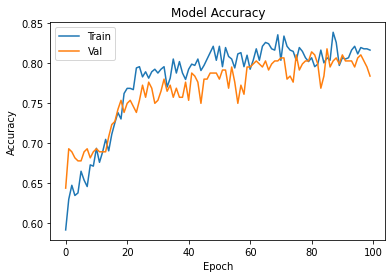

In [15]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

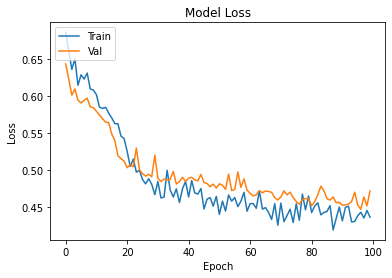

In [16]:
#Visualize the model's loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
96,0.442443,0.819777,0.446476,0.810606,96
98,0.444863,0.818182,0.451107,0.795455,98
80,0.442048,0.807018,0.451493,0.814394,80
90,0.430855,0.807018,0.451893,0.810606,90
95,0.437722,0.811802,0.452224,0.806818,95
...,...,...,...,...,...
7,0.630699,0.645933,0.596778,0.693182,7
2,0.635715,0.647528,0.600855,0.689394,2
3,0.649959,0.634769,0.609342,0.681818,3
1,0.661096,0.629984,0.622580,0.693182,1


#Kesimpulan
Hasil terbaik diperoleh pada epoch ke-96 dengan nilai akurasi sebesar 81.06% dan nilai val_loss sebesar 0.4465. Telah dilakukan banyak percobaan dengan mengganti ke model wider, deeper, serta tweaking optimizer, dan hasil terbaik diperoleh dengan model ini.